# **Part 1: Regression on California Test Scores**

In [294]:
#Import data

import pandas as pd

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
data.head()

#update data to set up for train test split
data = data.loc[:, data.columns != 'readscr']
data = data.loc[:, data.columns != 'mathscr']
data = data.loc[:, data.columns != 'distcod']
data = data.loc[:, data.dtypes != 'object']

y = data['testscr']
X = data.loc[:, data.columns != 'testscr']
data.head()

,Unnamed: 0,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,1,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,2,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,3,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,4,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,5,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


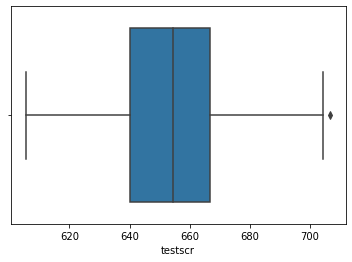

In [295]:
#Visualize data using boxplot
import matplotlib.pyplot as plt
import seaborn as sns
#Target variable
sns.boxplot(data['testscr'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


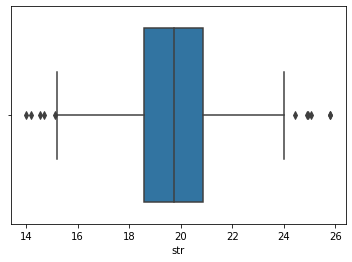

In [296]:
#Student teacher ratio
sns.boxplot(data['str'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


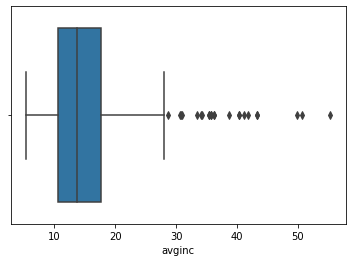

In [297]:
#Average income
sns.boxplot(data['avginc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


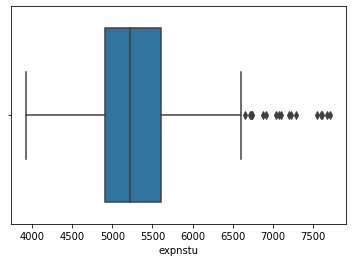

In [298]:
#Expenditure per student
sns.boxplot(data['expnstu'])

1.2 Visualize the dependency of the target on each feature from 1.1.

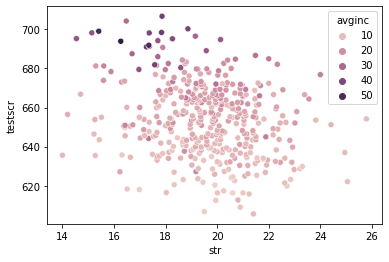

In [299]:
#Visualize relationship between average test score and student teacher ratio with scatterplot
#Set average income and expenditure per student as hue

sns.scatterplot(x='str', y='testscr', data=data, hue=data['avginc'])

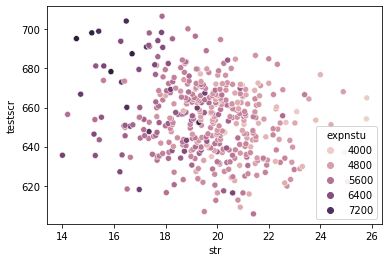

In [300]:
sns.scatterplot(x='str', y='testscr', data=data, hue=data['expnstu'])

1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [301]:
#Set up training and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

#Evaluate KNN for regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train) 

#Print accuracy rounded to two digits to the right of decimal
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)
y_pred

accuracy: 0.37


array([654.55998535, 663.96000977, 647.75      , 656.47001953,
       644.00001221, 641.1       , 646.64000244, 651.98999023,
       643.45      , 638.21999512, 648.10998535, 649.13000488,
       658.65998535, 637.88000488, 670.99001465, 668.79001465,
       640.92001953, 655.08999023, 649.71999512, 657.06998291,
       651.73000488, 655.70999756, 654.46000977, 656.05998535,
       651.91000977, 674.85999756, 656.61002197, 642.63999023,
       665.93001709, 647.70999756, 659.46999512, 653.05      ,
       664.04001465, 657.32999268, 666.15998535, 649.40999756,
       659.16999512, 647.10001221, 656.95001221, 657.35999756,
       653.19998779, 629.8       , 678.38999023, 647.10001221,
       649.00998535, 651.15997314, 664.51000977, 664.83000488,
       652.14001465, 653.43000488, 644.36000977, 667.52000732,
       636.50001221, 645.05998535, 662.33000488, 667.14998779,
       664.25001221, 659.25      , 637.81000977, 651.43000488,
       664.88999023, 657.47998047, 637.37999268, 659.61

In [302]:
#Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 1.14858902e-01  3.28544714e-04 -1.78189352e-03  7.60036814e-02
 -8.16519397e-02 -1.48675876e-03  1.42965029e+01  4.54085109e-04
 -1.18463399e-01  3.02037281e-01 -7.68197281e-02]
lr.intercept_: 626.7742356956769


In [303]:
#training set and test set performance using r squared:

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring="r2")))

Training set score: 0.94
Test set score: 0.91
0.9291659848797226


In [304]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("ridge.coef_: {}".format(ridge.coef_))

Training set score: 0.94
Test set score: 0.90
ridge.coef_: [ 1.13977357e-01  5.05691322e-04 -8.47307148e-03  6.87937535e-02
 -8.05919545e-02 -2.09290404e-04  6.69337135e+00  5.75080192e-04
 -1.75080975e-01  3.07315043e-01 -8.27121312e-02]


In [305]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print("lasso.coef_: {}".format(lasso.coef_))


Training set score: 0.94
Test set score: 0.90
Number of features used: 8
lasso.coef_: [ 1.14158066e-01 -2.09443222e-05 -0.00000000e+00  3.47269410e-02
 -7.49616832e-02  7.39821246e-04  0.00000000e+00  1.16387912e-03
 -0.00000000e+00  2.71821375e-01 -8.59852705e-02]


In [306]:
#Cross val scores
print(np.mean(cross_val_score(Ridge(), X_train, y_train, cv=5, scoring='r2')))
print(np.mean(cross_val_score(Lasso(), X_train, y_train, cv=5, scoring='r2')))
print(np.mean(cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=5, scoring='r2')))

0.9304609236739376
0.9313762393994043
0.33223532310952414


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.6308594932234, tolerance: 8.25802898609718
  positive)


In [307]:
#Implement StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

X_scaled = preprocessing.scale(X_train)
X_scaled

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print(ridge.score(X_test_scaled, y_test))
print(np.mean(cross_val_score(Ridge(), X_train_scaled, y_train, cv=5)))

0.9076748404155701
0.9297988089622395


In [308]:
lasso = Lasso().fit(X_train_scaled, y_train)
print(lasso.score(X_test_scaled, y_test))
print(np.mean(cross_val_score(Lasso(), X_train_scaled, y_train, cv=5, scoring='r2')))

0.8846041570279998
0.9275812615246997


In [309]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print(lr.score(X_test_scaled, y_test))
print(np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring="r2")))

0.9072408421724549
0.9291659848797231


In [310]:
knn = knn.fit(X_train_scaled, y_train)
print(knn.score(X_test_scaled, y_test))
print(np.mean(cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=5, scoring='r2')))

0.8682093131483752
0.8538338496450416


The cross validation scores do not improve after scaling with Standard Scaler.

1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [311]:
#Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 15, 2)} 

grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)

grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.384
best parameters: {'n_neighbors': 3}
test-set score: 0.407


In [312]:
#For Lasso
param_grid = {'alpha': np.arange(0.1, 10, 0.1)}

grid = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test))) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2315.7413174818216, tolerance: 8.292839216119408
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2037.2524748533108, tolerance: 8.121319724436901
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1997.8684607266268, tolerance: 7.975809273265566
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1819.0985

best mean cross-validation score: 0.931
best parameters: {'alpha': 1.6}
test-set score: 0.901


In [313]:
#For Ridge
param_grid = {'alpha': np.arange(1, 10, 0.5)}

grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.931
best parameters: {'alpha': 3.0}
test-set score: 0.904


Tuning the parameters with GridSearchCV does not improve the cross validation score of the K Nearest Neighbors Regressor.

1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [314]:
#Print coefficients for linear regression, ridge, lasso models
print("lr.coef_: {}".format(lr.coef_))
print("ridge.coef_: {}".format(ridge.coef_))
print("lasso.coef_: {}".format(lasso.coef_))

lr.coef_: [13.53065351  1.37162334 -0.3562804   0.8483214  -2.19525961 -0.69155811
  0.92498421  0.27972938 -0.21821472  2.17227457 -1.35324655]
ridge.coef_: [13.37196858  0.83295864  0.14884515  0.79434493 -2.25597002 -0.66584201
  0.90882827  0.29929705 -0.20195572  2.18110133 -1.38566873]
lasso.coef_: [13.09700289 -0.         -0.         -0.         -1.45475063  0.
  0.10622139  0.         -0.          1.83514897 -1.04985552]


Given that the linear regression and ridge regression models have relatively strong cross validation score of about 0.93, a comparison of their cofficients shows that they are very similar and supports the variables "teachers", "computers", "avginc", and "elpct" as the most important features.

1.6 Discuss which final model you would choose to predict new data

I would use the linear regression model to predict new data based on the test score result.

**Part 2: Classification on red and white wine characteristics**
---



In [315]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [316]:
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [317]:
#Create new column winetype and combine
df_red['winetype'] = 1
df_white['winetype'] = 0
df_wine = df_red.append(df_white)
df_wine.head(-5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,0
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,0
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,0
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,0


2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

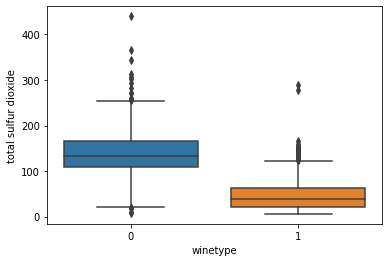

In [318]:
#Visualize relationship between target variable and explanatory variables
sns.boxplot(x='winetype', y='total sulfur dioxide', data=df_wine)

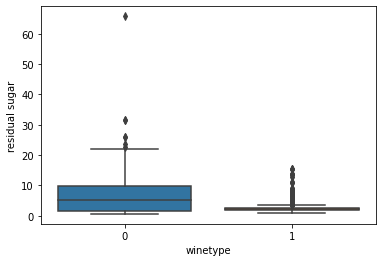

In [319]:
sns.boxplot(x='winetype', y='residual sugar', data=df_wine)

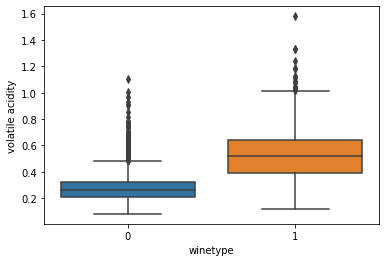

In [320]:
sns.boxplot(x='winetype', y='volatile acidity', data=df_wine)

2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = df_wine['winetype']
df_wine_new = df_wine.drop('winetype', 1)
X = df_wine_new

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

print(X_train.head())

#LogisticRegression
logr = LogisticRegression(C=1e90, penalty='none', max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logr.score(X_test, y_test)))

predicted_vals = logr.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
1539            7.2             0.390         0.32  ...       0.78      9.9        5
1109           10.8             0.470         0.43  ...       0.76     10.8        6
100             8.3             0.610         0.30  ...       0.61     10.2        6
3878            6.5             0.350         0.31  ...       0.49      9.4        5
4817            5.8             0.385         0.25  ...       0.63     11.2        6

[5 rows x 12 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Training set score: 0.990
Test set score: 0.986
logreg.predict: [0 1 0 ... 0 0 0]


In [322]:
print(np.mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=5)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9802946348654767


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [323]:
#Penalized logistic regression with default "l2"
logr_p = LogisticRegression(C=0.0001).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logr_p.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logr_p.score(X_test, y_test)))

predicted_vals = logr_p.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

Training set score: 0.933
Test set score: 0.924
logreg.predict: [0 0 0 ... 0 0 0]


In [324]:
print(np.mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=5)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9802946348654767


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The training and test set scores are lower in the penalized logistic regression model compared to the non-penalized model.

In [331]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)
print(y_pred)
print(np.mean(cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train, cv=5, scoring='accuracy')))

accuracy: 0.94
[0 1 0 ... 0 0 0]
0.9921998631074607


In [326]:
#StandardScaler

X_scaled = preprocessing.scale(X_train)
X_scaled

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn = knn.fit(X_train_scaled, y_train)
print(knn.score(X_test_scaled, y_test))
print(np.mean(cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train, cv=5, scoring='accuracy')))

logr = logr.fit(X_train_scaled, y_train)
print(logr.score(X_test_scaled, y_test))
print(np.mean(cross_val_score(LogisticRegression(), X_train_scaled, y_train, cv=5)))

logr_p = logr_p.fit(X_train_scaled, y_train)
print(logr_p.score(X_test_scaled, y_test))

0.9889230769230769
0.9921998631074607
0.9913846153846154
0.9936374453746115


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


0.7390769230769231


Scaling with Standard Scaler did not seem to affect the cross val score for KNN model but slightly improved the score for Logistic Regression model.

2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [327]:
#Tuning parameters with GridSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import StratifiedKFold

param_grid = {'n_neighbors': np.arange(1, 15, 2)} 

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

grid.fit(X_train, y_train)

skfold = StratifiedKFold(n_splits=5, shuffle=True)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))
print("StratifiedKFold:\n{}".format(
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold, scoring='accuracy'))))


best mean cross-validation score: 0.945
best parameters: {'n_neighbors': 1}
test-set score: 0.945
StratifiedKFold:
0.9404772284525877


2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [328]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

print("KFold:\n{}".format(
np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kfold, scoring='accuracy')))) 

KFold:
0.940477017848681


In [329]:
kfold = KFold(n_splits=5, shuffle=True, random_state=20)

print("KFold:\n{}".format(
np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kfold, scoring='accuracy'))))

KFold:
0.9433483915126626


In [330]:
#GridSearchCV for logistic regression
param_grid= {'C': np.logspace(-3, 3, 10, 10)}
grid=GridSearchCV(logr, param_grid, cv=10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))
print("logr_cvs:\n{}".format(
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold, scoring='accuracy'))))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


KeyboardInterrupt: ignored

In [333]:
#GridSearchCV for penalized logistic regression
param_grid= {'C': np.logspace(-3, 3, 10, 10)}
grid=GridSearchCV(logr_p, param_grid, cv=10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))
print("logr_p_cvs:\n{}".format(
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold, scoring='accuracy'))))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


best mean cross-validation score: 0.982
best parameters: {'C': 46.41588833612773}
test-set score: 0.977
logr_p_cvs:
0.9378069815195073


2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [332]:
print("logreg .coef_: {}".format(logr .coef_))
print("penalized logreg .coef_: {}".format(logr_p .coef_))

logreg .coef_: [[ 0.23593592  1.58974487 -0.28658209 -4.93808655  0.79248033  1.29840838
  -3.18179794  4.53207344  0.0204608   0.62839167  1.51230794  0.34655891]]
penalized logreg .coef_: [[ 0.07985703  0.10596628 -0.02978598 -0.05567489  0.08246915 -0.07314846
  -0.11545259  0.06505766  0.05473321  0.07867647 -0.00478781 -0.01710925]]


Based on the coefficients given I would choose to use Logistic Regression since it seems to result in more accurate predictions due to higher test score and the coefficients are more indicative of influence.